In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [62]:
# y = ax + b + e
# where epsilon is standard gaussian.
# x is distributed as uniform rv between [0,10].

n = 100
x = np.random.uniform(0, 10, n)

# a be any real number
a = np.random.uniform(0, 4, 1)
b = np.random.uniform(0, 4, 1)
e = np.random.normal(0, 1, n)

y = a * x + b + e

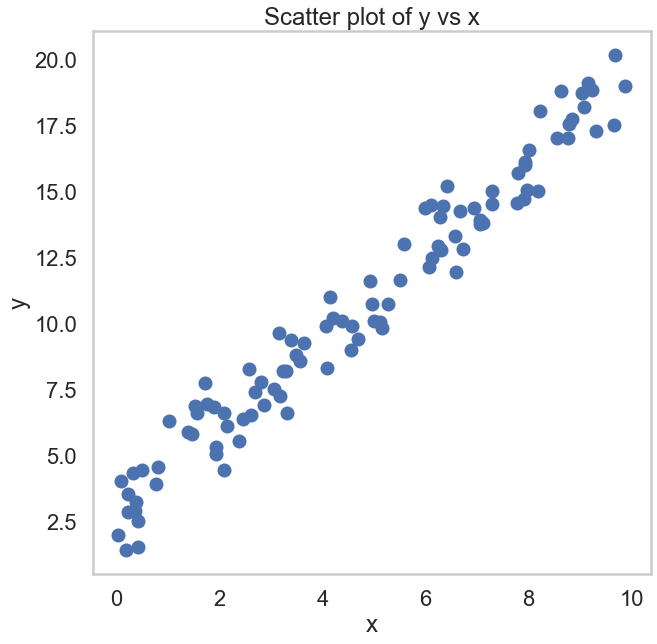

In [63]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [64]:
# normalise the data
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()


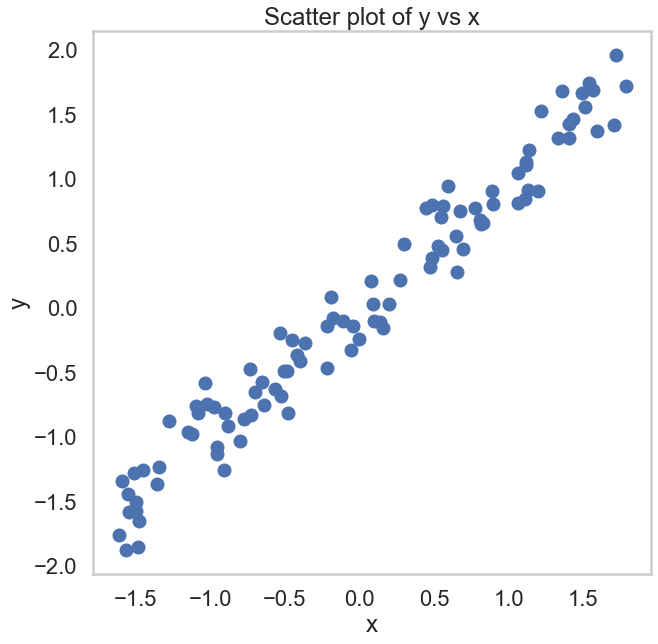

In [65]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x_norm, y_norm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [ ]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    #if the length of x is one less than the length of theta then add a column of ones to x to the front
    if len(x) == len(theta) - 1:
        #print(len(x), len(theta))
        x = np.insert(x, 0, 1)
    return np.dot(theta, x)

In [ ]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2

   # print("cost = ",cost/2*(len(y)))
    return cost/2*(len(y))

In [ ]:
def batch_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for i in range(iterations):
        # if i > 0 and i%100 == 0:
        #     print(i)
        temp_theta = theta.copy()
        for j in range(len(theta)):
            temp=0
            for k in range(len(y)):
                temp+=(hypothesis(theta, x[k]) - y[k])*x[k][j]
            # theta[j] = theta[j] - alpha*(1/(len(y)))*temp
            temp_theta[j] = temp_theta[j] - alpha*(1/(len(y)))*temp
        theta = temp_theta.copy()
        #compare current loss with previous loss if loss is not decreasing then break
        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if i>0:
            if cost_list[i-1]-cost_list[i] < epsilon:
                break
        

    return theta, theta_list, cost_list

In [74]:
def augment (X, d, aug_intercept = False):
    if aug_intercept:
        X = np.c_[np.ones(len(X)), X]
    for i in range(2,d+1):
        X = np.c_[X, np.power(X[:,1],i)]

    return X

In [75]:
X_aug_2 = augment(x_norm, 2, aug_intercept = True)
X_aug_5 = augment(x_norm, 5, aug_intercept = True)
X_aug_10 = augment(x_norm, 10, aug_intercept = True)

In [77]:
print(X_aug_2[0])
print(X_aug_5[0])
print(X_aug_10[0])

[1.         1.50928214 2.27793259]
[1.         1.50928214 2.27793259 3.43804298 5.18897687 7.83163014]
[ 1.          1.50928214  2.27793259  3.43804298  5.18897687  7.83163014
 11.82013952 17.8399255  26.925481   40.63814766 61.3344306 ]
